In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
nba =  pd.read_csv('players_stats.csv')
nba.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


In [3]:
nba = nba.drop(['MIN','FGM','FGA','FG%','3PM','3PA','FTM','FTA','OREB','DREB','TOV','PF','EFF','AST/TOV','STL/TOV','Age','Birth_Place','Birthdate','Collage','Experience','Height','Pos','Team','Weight','BMI'], axis=1)
# 'Name','Games Played', 'PTS', '3P%', 'FT%', 'REB','AST','STL','BLK'
nba

,Name,Games Played,PTS,3P%,FT%,REB,AST,STL,BLK
0,AJ Price,26,133,26.3,66.7,32,46,7,0
1,Aaron Brooks,82,954,38.7,83.3,166,261,54,15
2,Aaron Gordon,47,243,27.1,72.1,169,33,21,22
3,Adreian Payne,32,213,11.1,65.2,162,30,19,9
4,Al Horford,76,1156,30.6,75.9,544,244,68,98
5,Al Jefferson,65,1082,40.0,65.5,548,113,47,84
6,Alan Anderson,74,545,34.8,81.2,204,83,56,5
7,Alec Burks,27,374,38.2,82.2,114,82,17,5
8,Alex Kirk,5,4,0.0,100.0,1,1,0,0
9,Alex Len,69,432,33.3,70.2,454,32,34,105


In [4]:
Xnba = nba.iloc[:, 1:10].values
Xnba

array([[  26. ,  133. ,   26.3, ...,   46. ,    7. ,    0. ],
       [  82. ,  954. ,   38.7, ...,  261. ,   54. ,   15. ],
       [  47. ,  243. ,   27.1, ...,   33. ,   21. ,   22. ],
       ...,
       [  71. , 1143. ,   35. , ...,  153. ,   69. ,   14. ],
       [  73. ,  606. ,    0. , ...,  178. ,   80. ,   21. ],
       [  16. ,   28. ,   21.4, ...,    5. ,    2. ,    0. ]])

In [5]:
# Parametrizando K-Means com 3 Clusters e Metodo de Inicialização Randômica
kmeans = KMeans(n_clusters = 3, init = 'random')

In [6]:
# Aplicando o K-Means
kmeans.fit(Xnba)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Aplicando o K-Means
kmeans.fit(Xnba)

In [7]:
# Listando os Centroids para cada um dos 03 Clusters
kmeans.cluster_centers_

array([[  68.70520231,  657.19075145,   28.06647399,   74.51907514,
         296.78612717,  140.58959538,   50.58959538,   32.87861272],
       [  35.32098765,  163.43621399,   22.05144033,   65.29135802,
          89.74485597,   39.31687243,   16.19341564,   10.27572016],
       [  74.43243243, 1251.67567568,   30.95135135,   77.87972973,
         450.68918919,  274.67567568,   85.72972973,   48.81081081]])

In [8]:
# Realcula os Centroids..
kmeans.fit(Xnba)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
kmeans.cluster_centers_

array([[  68.88439306,  667.01156069,   28.2150289 ,   74.81387283,
         296.74566474,  145.09248555,   50.83815029,   32.52023121],
       [  74.42253521, 1263.8028169 ,   30.95352113,   77.64225352,
         460.95774648,  270.43661972,   86.73239437,   50.28169014],
       [  35.67479675,  166.30081301,   22.05487805,   65.30609756,
          91.21138211,   40.24390244,   16.57723577,   10.57317073]])

In [10]:
# Executa K-Means para agrupar os dados e retorna Tabela de Distancias
# Calcula a distancia entre os dados de cada linha (instância) e cada um dos 3 clusters
distance = kmeans.fit_transform(Xnba)
distance

array([[1234.69153573,   70.46378984,  608.24818696],
       [ 430.73489604,  823.99243099,  336.99001315],
       [1090.67503337,  111.06895311,  458.42993937],
       ...,
       [ 334.46231829, 1183.64462139,  655.80690448],
       [ 666.81151693,  620.97752875,  218.92849138],
       [1347.723807  ,  167.4316295 ,  719.61178628]])

In [11]:
# Para cada uma das instâncias, a qual dos 3 clusters ela pertence..0, 1 ou 2 ?
labels = kmeans.labels_
labels

array([1, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 1,
       1, 1, 1, 2, 1, 0, 1, 0, 2, 2, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 1,
       0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 0,
       1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1,
       0, 2, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2,
       1, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 1, 1, 1, 2,

In [12]:
nba['cluster'] = labels
nba

,Name,Games Played,PTS,3P%,FT%,REB,AST,STL,BLK,cluster
0,AJ Price,26,133,26.3,66.7,32,46,7,0,1
1,Aaron Brooks,82,954,38.7,83.3,166,261,54,15,2
2,Aaron Gordon,47,243,27.1,72.1,169,33,21,22,1
3,Adreian Payne,32,213,11.1,65.2,162,30,19,9,1
4,Al Horford,76,1156,30.6,75.9,544,244,68,98,0
5,Al Jefferson,65,1082,40.0,65.5,548,113,47,84,0
6,Alan Anderson,74,545,34.8,81.2,204,83,56,5,2
7,Alec Burks,27,374,38.2,82.2,114,82,17,5,1
8,Alex Kirk,5,4,0.0,100.0,1,1,0,0,1
9,Alex Len,69,432,33.3,70.2,454,32,34,105,2


In [13]:
# Centroides Calculados para cada uma das Features, para cada um dos 3 clusters
kmeans.cluster_centers_

array([[  74.42253521, 1263.8028169 ,   30.95352113,   77.64225352,
         460.95774648,  270.43661972,   86.73239437,   50.28169014],
       [  35.67479675,  166.30081301,   22.05487805,   65.30609756,
          91.21138211,   40.24390244,   16.57723577,   10.57317073],
       [  68.88439306,  667.01156069,   28.2150289 ,   74.81387283,
         296.74566474,  145.09248555,   50.83815029,   32.52023121]])

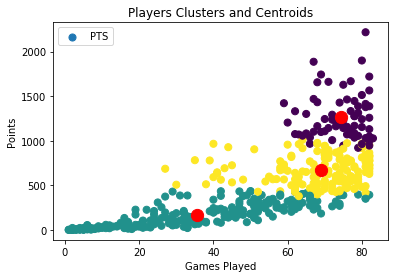

In [14]:
# Visualizando os Clusters
x = nba['Games Played']
y = nba['PTS']
plt.scatter(x, y, s = 50, c = nba['cluster'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'red')
plt.title('Players Clusters and Centroids')
plt.xlabel('Games Played')
plt.ylabel('Points')
plt.legend()
plt.show()

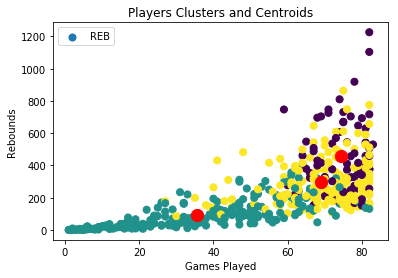

In [15]:
# Visualizando os Clusters
x = nba['Games Played']
y = nba['REB']
plt.scatter(x, y, s = 50, c = nba['cluster'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 4], s = 150, c = 'red')
plt.title('Players Clusters and Centroids')
plt.xlabel('Games Played')
plt.ylabel('Rebounds')
plt.legend()
plt.show()

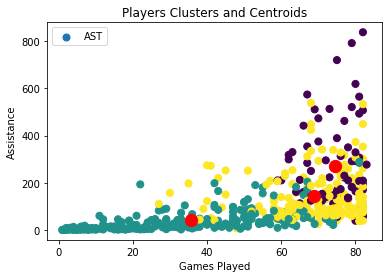

In [16]:
# Visualizando os Clusters
x = nba['Games Played']
y = nba['AST']
plt.scatter(x, y, s = 50, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 5], s = 150, c = 'red')
plt.title('Players Clusters and Centroids')
plt.xlabel('Games Played')
plt.ylabel('Assistance')
plt.legend()
plt.show()

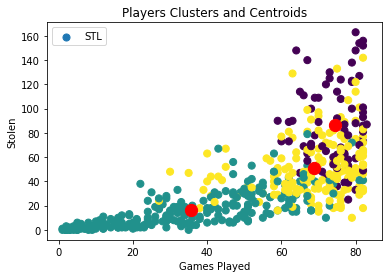

In [17]:
# Visualizando os Clusters
x = nba['Games Played']
y = nba['STL']
plt.scatter(x, y, s = 50, c = nba['cluster'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 6], s = 150, c = 'red')
plt.title('Players Clusters and Centroids')
plt.xlabel('Games Played')
plt.ylabel('Stolen')
plt.legend()
plt.show()

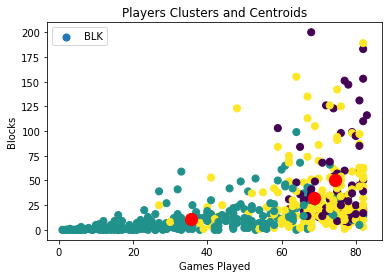

In [18]:
# Visualizando os Clusters
x = nba['Games Played']
y = nba['BLK']
plt.scatter(x, y, s = 50, c = nba['cluster'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 7], s = 150, c = 'red')
plt.title('Players Clusters and Centroids')
plt.xlabel('Games Played')
plt.ylabel('Blocks')
plt.legend()
plt.show()

In [19]:
# Vamos agrupar uma nova instância ?
# Dado um perfil de cliente, cliente
# O resultado indica a qual cluster esse novo cliente foi atribuído!
newcustomer = [ [70,750,30.8,75.9,380,150,66,27] ]
kmeans.predict(newcustomer)

array([2])

1 114523864.53112246
2 43648836.66251006
3 27845186.50521443
4 21082383.738023844
5 17966505.705822088
6 15034177.411466794
7 13059239.092528637
8 11655159.04980411
9 10851714.060420062
10 10153317.364658594


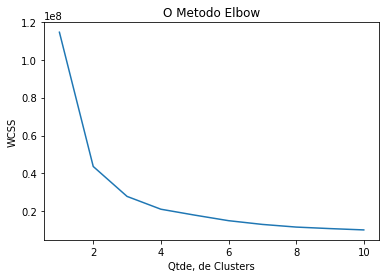

In [20]:
# Metododo de Elbow: como encontrar valor ideal de K ?
# Basicamente o que o método faz é testar a variância dos dados em relação ao número de clu
# O que percebemos no Gráfico abaixo?
# Soma dos erros quadráticos de cada cluster (WCSS) cai e se estabiliza, à medida que aumen
wcss = []
maxclusters = 11
for i in range(1, maxclusters):
 kmeans = KMeans(n_clusters = i, init = 'random')
 kmeans.fit(Xnba)
 print(i,kmeans.inertia_)
 wcss.append(kmeans.inertia_)
plt.plot(range(1, maxclusters), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Qtde, de Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()